In [0]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# grid search CV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [0]:
 # import the dataset
from google.colab import drive
import io

In [0]:
#enables to display all the columns in the notebooks results
pd.options.display.max_columns = None

In [5]:
#use this block to read the data file from google drive. Comment this block if not reading from google drive
drive.mount('/content/drive')
telecom_churn_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/telecom_churn_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#use this block to upload the csv and read the data file from google colabs. Comment this block if not uploading the csv file and reading
#from google.colab import files
#uploaded = files.upload()
#telecom_churn_data = pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']))

In [0]:
# Read the data file from the local disk in the local environment. Uncomment this block if running in the local environment
#telecom_churn_data = pd.read_csv('./telecom_churn_data.csv')

Rename the 1st column with mobile_number. Convert the column names of month in string to number. Ex: jun to 6, jul 7 etc.

In [0]:
telecom_churn_data.rename(columns = {' ':'mobile_number','jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True) 

In [9]:
telecom_churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [10]:
telecom_churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

telecom_churn_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)
telecom_churn_data.columns.values

In [11]:
telecom_churn_data.shape

(99999, 226)

Fill NA columns releated to recharge. Aussuming that there is no recharge so we can safely impute 0

In [0]:
reacharge_cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
for col in reacharge_cols:
  telecom_churn_data[col].fillna(0,inplace=True) 



Add new column for amount spent of data recharge. i.e  total_rech_data_< mon > * av_rech_amt_data_< mon >

In [0]:
telecom_churn_data['total_rech_data_amt_6'] = telecom_churn_data["total_rech_data_6"]  * telecom_churn_data['av_rech_amt_data_6']
telecom_churn_data['total_rech_data_amt_7'] = telecom_churn_data["total_rech_data_7"]  * telecom_churn_data['av_rech_amt_data_7']
telecom_churn_data['total_rech_data_amt_8'] = telecom_churn_data["total_rech_data_8"]  * telecom_churn_data['av_rech_amt_data_8']
telecom_churn_data['total_rech_data_amt_9'] = telecom_churn_data["total_rech_data_9"]  * telecom_churn_data['av_rech_amt_data_9']

Add a new derived column to get the average of recharge for month Jun and Jul which will be used to filter high value customer later

In [0]:
telecom_churn_data['total_avg_rech_6_7'] = ((telecom_churn_data['total_rech_amt_6'] + telecom_churn_data['total_rech_data_amt_6']) + (telecom_churn_data['total_rech_amt_7']+ telecom_churn_data['total_rech_data_amt_7']))/2


drop the reacharge amount for data columns since we have a derived column  based on this information in total_rech_data_amt_< mon >

In [15]:
drop_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
telecom_churn_data.drop(drop_cols, axis=1, inplace=True)
telecom_churn_data.shape

(99999, 223)

Percentile information on total_avg_rech_6_7 column to see the 70% percentile recharge amount to filter high value customers as mentioned in the problem statement

In [16]:
telecom_churn_data[['total_avg_rech_6_7']].describe(percentiles=[.2,.3,.4,.5,.6,.7,.8,.9])
display(telecom_churn_data['total_avg_rech_6_7'].quantile(0.70))

478.0

filter the dataframe to get high value customers greater than or equal to 70% on total_avg_rech_6_7

In [17]:
telecom_churn_data = telecom_churn_data.drop(telecom_churn_data[telecom_churn_data['total_avg_rech_6_7']<telecom_churn_data['total_avg_rech_6_7'].quantile(0.70)].index)
telecom_churn_data.shape

(30001, 223)

After filtering the dataframe found that there are approximately 30k high value customers close to what is mentioned in the case study problem

#Data Cleanup and EDA

Removing the column mobile_number since it will not used in the classification. remove circle_id because it is from the same provider or circle

In [0]:
telecom_churn_data = telecom_churn_data.drop(['mobile_number', 'circle_id'],axis="columns")

In [0]:
#Replace null for last_date_of the month with unique value for that column
telecom_churn_data["last_date_of_month_6"].fillna(telecom_churn_data["last_date_of_month_6"].unique()[0],inplace=True)
telecom_churn_data["last_date_of_month_7"].fillna(telecom_churn_data["last_date_of_month_7"].unique()[0],inplace=True)
telecom_churn_data["last_date_of_month_8"].fillna(telecom_churn_data["last_date_of_month_8"].unique()[0],inplace=True)
telecom_churn_data["last_date_of_month_9"].fillna(telecom_churn_data["last_date_of_month_9"].unique()[0],inplace=True)
#convert the column dtype to datetime format
telecom_churn_data[["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"]] = telecom_churn_data[["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"]].apply(pd.to_datetime)
#extract the calender days for the month
telecom_churn_data['no_of_days_6'] =  telecom_churn_data.last_date_of_month_6.dt.day
telecom_churn_data['no_of_days_7'] =  telecom_churn_data.last_date_of_month_7.dt.day
telecom_churn_data['no_of_days_8'] =  telecom_churn_data.last_date_of_month_8.dt.day
telecom_churn_data['no_of_days_9'] =  telecom_churn_data.last_date_of_month_9.dt.day

In [0]:
#convert the column dtype to datetime format
telecom_churn_data[["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"]] = telecom_churn_data[["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"]].apply(pd.to_datetime)
#extract the calender day on which recharge was made from the date
telecom_churn_data['day_of_last_rech_6'] =  telecom_churn_data.date_of_last_rech_6.dt.day
telecom_churn_data['day_of_last_rech_7'] =  telecom_churn_data.date_of_last_rech_7.dt.day
telecom_churn_data['day_of_last_rech_8'] =  telecom_churn_data.date_of_last_rech_8.dt.day
telecom_churn_data['day_of_last_rech_9'] =  telecom_churn_data.date_of_last_rech_9.dt.day

#convert the column dtype to datetime format
telecom_churn_data[["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9"]] = telecom_churn_data[["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9"]].apply(pd.to_datetime)
#extract the calender day on which recharge of data was made from the date
telecom_churn_data['day_of_last_rech_data_6'] =  telecom_churn_data.date_of_last_rech_data_6.dt.day
telecom_churn_data['day_of_last_rech_data_7'] =  telecom_churn_data.date_of_last_rech_data_7.dt.day
telecom_churn_data['day_of_last_rech_data_8'] =  telecom_churn_data.date_of_last_rech_data_8.dt.day
telecom_churn_data['day_of_last_rech_data_9'] =  telecom_churn_data.date_of_last_rech_data_9.dt.day
#fill NA values with 0 which does not have recharge
for col in ["day_of_last_rech_6","day_of_last_rech_7","day_of_last_rech_8","day_of_last_rech_9","day_of_last_rech_data_6","day_of_last_rech_data_7","day_of_last_rech_data_8","day_of_last_rech_data_9"]:
  telecom_churn_data[col].fillna(0,inplace=True)


In [21]:
#drop the date columns since we have extracted the information required for futher analysis
drop_date_cols = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9","date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"]
telecom_churn_data.drop(drop_date_cols, axis=1, inplace=True)
telecom_churn_data.shape

(30001, 221)

In [22]:
#get cols which has only 1 unique value
df = telecom_churn_data.loc[:,telecom_churn_data.apply(pd.Series.nunique) == 1]
df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  std_og_t2c_mou_6  \
0              0.0             0.0             0.0               NaN   
7              0.0             0.0             0.0               0.0   
8              0.0             0.0             0.0               0.0   
21             0.0             0.0             0.0               0.0   
23             0.0             0.0             0.0               0.0   

    std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_ic_t2o_mou_6  \
0                NaN               0.0               NaN               NaN   
7                0.0               0.0               NaN               0.0   
8                0.0               0.0               0.0               0.0   
21               0.0               0.0               0.0               0.0   
23               0.0               0.0               0.0               0.0   

    std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  no_of_days_6  \
0                NaN               0.0               NaN            30   
7                0.0               0.0               NaN            30   
8                0.0               0.0               0.0            30   
21               0.0               0.0               0.0            30   
23               0.0               0.0               0.0            30   

    no_of_days_7  no_of_days_8  no_of_days_9  
0             31            31            30  
7             31            31            30  
8             31            31            30  
21            31            31            30  
23            31            31            30

In [23]:
#drop the cols which has only 1 unique value since it will be not useful to draw any inference
telecom_churn_data = telecom_churn_data.loc[:,telecom_churn_data.apply(pd.Series.nunique) != 1]
telecom_churn_data.shape

(30001, 206)

In [24]:
#function which displays the column wise percentage of null values
def display_null_cols():
  for col in telecom_churn_data.columns.values:   
    percentage = (telecom_churn_data[col].isnull().sum()/len(telecom_churn_data))*100
    if percentage>0.0:
      display(col + "====================== " + str(round(percentage)))
display_null_cols()

'onnet_mou_6====================== 2.0'

'onnet_mou_7====================== 2.0'

'onnet_mou_8====================== 4.0'

'onnet_mou_9====================== 6.0'

'offnet_mou_6====================== 2.0'

'offnet_mou_7====================== 2.0'

'offnet_mou_8====================== 4.0'

'offnet_mou_9====================== 6.0'

'roam_ic_mou_6====================== 2.0'

'roam_ic_mou_7====================== 2.0'

'roam_ic_mou_8====================== 4.0'

'roam_ic_mou_9====================== 6.0'

'roam_og_mou_6====================== 2.0'

'roam_og_mou_7====================== 2.0'

'roam_og_mou_8====================== 4.0'

'roam_og_mou_9====================== 6.0'

'loc_og_t2t_mou_6====================== 2.0'

'loc_og_t2t_mou_7====================== 2.0'

'loc_og_t2t_mou_8====================== 4.0'

'loc_og_t2t_mou_9====================== 6.0'

'loc_og_t2m_mou_6====================== 2.0'

'loc_og_t2m_mou_7====================== 2.0'

'loc_og_t2m_mou_8====================== 4.0'

'loc_og_t2m_mou_9====================== 6.0'

'loc_og_t2f_mou_6====================== 2.0'

'loc_og_t2f_mou_7====================== 2.0'

'loc_og_t2f_mou_8====================== 4.0'

'loc_og_t2f_mou_9====================== 6.0'

'loc_og_t2c_mou_6====================== 2.0'

'loc_og_t2c_mou_7====================== 2.0'

'loc_og_t2c_mou_8====================== 4.0'

'loc_og_t2c_mou_9====================== 6.0'

'loc_og_mou_6====================== 2.0'

'loc_og_mou_7====================== 2.0'

'loc_og_mou_8====================== 4.0'

'loc_og_mou_9====================== 6.0'

'std_og_t2t_mou_6====================== 2.0'

'std_og_t2t_mou_7====================== 2.0'

'std_og_t2t_mou_8====================== 4.0'

'std_og_t2t_mou_9====================== 6.0'

'std_og_t2m_mou_6====================== 2.0'

'std_og_t2m_mou_7====================== 2.0'

'std_og_t2m_mou_8====================== 4.0'

'std_og_t2m_mou_9====================== 6.0'

'std_og_t2f_mou_6====================== 2.0'

'std_og_t2f_mou_7====================== 2.0'

'std_og_t2f_mou_8====================== 4.0'

'std_og_t2f_mou_9====================== 6.0'

'std_og_mou_6====================== 2.0'

'std_og_mou_7====================== 2.0'

'std_og_mou_8====================== 4.0'

'std_og_mou_9====================== 6.0'

'isd_og_mou_6====================== 2.0'

'isd_og_mou_7====================== 2.0'

'isd_og_mou_8====================== 4.0'

'isd_og_mou_9====================== 6.0'

'spl_og_mou_6====================== 2.0'

'spl_og_mou_7====================== 2.0'

'spl_og_mou_8====================== 4.0'

'spl_og_mou_9====================== 6.0'

'og_others_6====================== 2.0'

'og_others_7====================== 2.0'

'og_others_8====================== 4.0'

'og_others_9====================== 6.0'

'loc_ic_t2t_mou_6====================== 2.0'

'loc_ic_t2t_mou_7====================== 2.0'

'loc_ic_t2t_mou_8====================== 4.0'

'loc_ic_t2t_mou_9====================== 6.0'

'loc_ic_t2m_mou_6====================== 2.0'

'loc_ic_t2m_mou_7====================== 2.0'

'loc_ic_t2m_mou_8====================== 4.0'

'loc_ic_t2m_mou_9====================== 6.0'

'loc_ic_t2f_mou_6====================== 2.0'

'loc_ic_t2f_mou_7====================== 2.0'

'loc_ic_t2f_mou_8====================== 4.0'

'loc_ic_t2f_mou_9====================== 6.0'

'loc_ic_mou_6====================== 2.0'

'loc_ic_mou_7====================== 2.0'

'loc_ic_mou_8====================== 4.0'

'loc_ic_mou_9====================== 6.0'

'std_ic_t2t_mou_6====================== 2.0'

'std_ic_t2t_mou_7====================== 2.0'

'std_ic_t2t_mou_8====================== 4.0'

'std_ic_t2t_mou_9====================== 6.0'

'std_ic_t2m_mou_6====================== 2.0'

'std_ic_t2m_mou_7====================== 2.0'

'std_ic_t2m_mou_8====================== 4.0'

'std_ic_t2m_mou_9====================== 6.0'

'std_ic_t2f_mou_6====================== 2.0'

'std_ic_t2f_mou_7====================== 2.0'

'std_ic_t2f_mou_8====================== 4.0'

'std_ic_t2f_mou_9====================== 6.0'

'std_ic_mou_6====================== 2.0'

'std_ic_mou_7====================== 2.0'

'std_ic_mou_8====================== 4.0'

'std_ic_mou_9====================== 6.0'

'spl_ic_mou_6====================== 2.0'

'spl_ic_mou_7====================== 2.0'

'spl_ic_mou_8====================== 4.0'

'spl_ic_mou_9====================== 6.0'

'isd_ic_mou_6====================== 2.0'

'isd_ic_mou_7====================== 2.0'

'isd_ic_mou_8====================== 4.0'

'isd_ic_mou_9====================== 6.0'

'ic_others_6====================== 2.0'

'ic_others_7====================== 2.0'

'ic_others_8====================== 4.0'

'ic_others_9====================== 6.0'

'max_rech_data_6====================== 44.0'

'max_rech_data_7====================== 43.0'

'max_rech_data_8====================== 47.0'

'max_rech_data_9====================== 49.0'

'count_rech_2g_6====================== 44.0'

'count_rech_2g_7====================== 43.0'

'count_rech_2g_8====================== 47.0'

'count_rech_2g_9====================== 49.0'

'count_rech_3g_6====================== 44.0'

'count_rech_3g_7====================== 43.0'

'count_rech_3g_8====================== 47.0'

'count_rech_3g_9====================== 49.0'

'arpu_3g_6====================== 44.0'

'arpu_3g_7====================== 43.0'

'arpu_3g_8====================== 47.0'

'arpu_3g_9====================== 49.0'

'arpu_2g_6====================== 44.0'

'arpu_2g_7====================== 43.0'

'arpu_2g_8====================== 47.0'

'arpu_2g_9====================== 49.0'

'night_pck_user_6====================== 44.0'

'night_pck_user_7====================== 43.0'

'night_pck_user_8====================== 47.0'

'night_pck_user_9====================== 49.0'

'fb_user_6====================== 44.0'

'fb_user_7====================== 43.0'

'fb_user_8====================== 47.0'

'fb_user_9====================== 49.0'

cannot drop rows with null cat values, if we do we will be deleting valied data rows. instead of levaing it as null, imputing it to create a new cat value. as all the cat columns have 0 or 1 as the values, replacing the null values with -1

In [0]:
category_cols =  ['night_pck_user_6',
                 'night_pck_user_7',
                 'night_pck_user_8',
                 'night_pck_user_9',
                 'fb_user_6',
                 'fb_user_7',
                 'fb_user_8',
                 'fb_user_9' ]
telecom_churn_data[category_cols] = telecom_churn_data[category_cols].apply(lambda x: x.fillna(-1))


remove all the columns where we have 40% missing values. ex max_rech_data_< mon >, count_rech_2g_< mon >, count_rech_3g_< mon >, arpu_3g_< mon >, night_pck_user_< mon >, fb_user_< mon >

In [26]:
#Function to remove given cols
def remove_columns(cols):
  global telecom_churn_data
  telecom_churn_data = telecom_churn_data.drop(cols,axis="columns")

#Get all columns with min and max with value 0  
def get_null_columns_greater_than_40():
  global telecom_churn_data
  col_list = list()
  for col in telecom_churn_data.columns.values:
    percentage = (telecom_churn_data[col].isnull().sum()/len(telecom_churn_data))*100 
    if col.find('day_')<0 and percentage>40.0:
      col_list.append(col)
  return col_list

cols=get_null_columns_greater_than_40()
remove_columns(cols)

telecom_churn_data.shape

(30001, 186)

In [27]:
corr_matrix = telecom_churn_data.corr() # df is the pandas dataframe
corr_matrix.loc[:,:] = np.tril(corr_matrix, k=-1)
corr_matrix = corr_matrix.stack()
corr_matrix[(corr_matrix > 0.60) | (corr_matrix < -0.60)].sort_values()

monthly_3g_6        vol_3g_mb_6         0.601308
total_ic_mou_7      loc_ic_t2t_mou_7    0.601684
total_og_mou_8      onnet_mou_9         0.603450
total_rech_amt_8    arpu_6              0.603673
roam_og_mou_8       roam_og_mou_7       0.604862
offnet_mou_8        offnet_mou_6        0.604877
total_ic_mou_8      loc_ic_t2t_mou_8    0.605243
std_ic_mou_6        std_ic_t2m_mou_7    0.606225
std_og_mou_9        std_og_t2m_mou_8    0.606539
std_ic_mou_7        std_ic_t2m_mou_8    0.606866
loc_og_mou_6        loc_og_t2t_mou_7    0.607059
vbc_3g_8            vol_3g_mb_8         0.607689
std_og_mou_8        std_og_t2m_mou_9    0.608170
std_og_mou_9        offnet_mou_9        0.608690
total_rech_amt_8    total_rech_amt_6    0.609306
total_og_mou_6      std_og_t2t_mou_6    0.610417
total_rech_amt_6    arpu_8              0.610687
std_og_mou_7        std_og_t2t_mou_8    0.611096
roam_ic_mou_8       roam_ic_mou_7       0.611479
monthly_3g_7        monthly_3g_6        0.611599
last_day_rch_amt_7  

In [28]:
#minimizing columns by dropping highly correlated columns has this information is avialable in the other columns
drop_cols=[
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8'
]
telecom_churn_data = telecom_churn_data.drop(drop_cols,axis="columns")
telecom_churn_data.shape

(30001, 177)

In [29]:
# Resetting index since we have dropped rows
telecom_churn_data = telecom_churn_data.reset_index(drop=True)
telecom_churn_data.head(5)

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0   197.385   214.816   213.803   21.100          NaN          NaN   
1  1069.180  1349.850  3171.480  500.000        57.84        54.68   
2   378.721   492.223   137.362  166.787       413.69       351.03   
3   514.453   597.753   637.760  578.596       102.41       132.11   
4    74.350   193.897   366.966  811.480        48.96        50.66   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00          NaN           NaN           NaN          0.00   
1        52.29          NaN        453.43        567.16        325.91   
2        35.08        33.46         94.66         80.63        136.48   
3        85.14       161.63        757.93        896.68        983.39   
4        33.58        15.74         85.41         89.36        205.89   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           NaN            NaN            NaN           0.00            NaN   
1           NaN          16.23          33.49          31.64            NaN   
2        108.71           0.00           0.00           0.00            0.0   
3        869.89           0.00           0.00           0.00            0.0   
4        111.88           0.00           0.00           0.00            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN           0.00            NaN   
1          23.74          12.59          38.06            NaN   
2           0.00           0.00           0.00            0.0   
3           0.00           0.00           0.00            0.0   
4           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28               NaN   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28               NaN   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               NaN   
2              0.00              0.00              0.00              0.00   
3              0.75              0.00              1.58              0.00   
4              0.00              0.00              0.00              2.45   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0               0.0              0.00               NaN   
2               0.0               0.0              7.15              0.00   
3               0.0               0.0              0.00              0.00   
4               0.0               0.0             17.71              4.08   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1        422.16        533.91        255.79           NaN              4.30   
2        378.09        288.18         63.04         60.71            116.56   
3         97.04         94.09        129.74        137.53             97.93   
4        131.91        133.68   

In [30]:
from fancyimpute import KNN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


fill the null columns with less than 10% missing values with fancyimpute KNN method 

In [31]:
def replace_with_knn():
  global telecom_churn_data
  col_list = list()
  for col in telecom_churn_data.columns.values:   
      percentage = (telecom_churn_data[col].isnull().sum()/len(telecom_churn_data))*100
      if percentage <=10.0 and percentage>0.0 and col.find("date_of")<0:
        col_list.append(col)
  X_filled_knn = KNN(k=3).fit_transform(telecom_churn_data[col_list])
  
  telecom_churn_data = telecom_churn_data.drop(col_list,axis="columns")
  df = pd.DataFrame(data=X_filled_knn,columns=col_list)
  
  for col in col_list:
    telecom_churn_data[col] = df[col]
    
display(telecom_churn_data.shape)
replace_with_knn()
display(telecom_churn_data.shape)

(30001, 177)

Imputing row 1/30001 with 81 missing, elapsed time: 866.872
Imputing row 101/30001 with 0 missing, elapsed time: 866.926
Imputing row 201/30001 with 54 missing, elapsed time: 866.973
Imputing row 301/30001 with 0 missing, elapsed time: 867.014
Imputing row 401/30001 with 0 missing, elapsed time: 867.024
Imputing row 501/30001 with 0 missing, elapsed time: 867.079
Imputing row 601/30001 with 0 missing, elapsed time: 867.119
Imputing row 701/30001 with 0 missing, elapsed time: 867.149
Imputing row 801/30001 with 0 missing, elapsed time: 867.188
Imputing row 901/30001 with 0 missing, elapsed time: 867.213
Imputing row 1001/30001 with 0 missing, elapsed time: 867.231
Imputing row 1101/30001 with 0 missing, elapsed time: 867.312
Imputing row 1201/30001 with 0 missing, elapsed time: 867.377
Imputing row 1301/30001 with 0 missing, elapsed time: 867.382
Imputing row 1401/30001 with 0 missing, elapsed time: 867.403
Imputing row 1501/30001 with 0 missing, elapsed time: 867.451
Imputing row 1601/

(30001, 177)

In [32]:
telecom_churn_data.head()

arpu_6    arpu_7    arpu_8   arpu_9  total_og_mou_9  total_ic_mou_9  \
0   197.385   214.816   213.803   21.100            0.00            0.00   
1  1069.180  1349.850  3171.480  500.000            0.00            0.00   
2   378.721   492.223   137.362  166.787          142.18           34.91   
3   514.453   597.753   637.760  578.596         1031.53          252.61   
4    74.350   193.897   366.966  811.480          127.63          127.48   

   total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
0                 6               362               252               252   
1                 3              1580               790              3638   
2                15               437               601               120   
3                17               600               680               718   
4                 4                 0               454               439   

   total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                 0             252             252             252   
1                 0            1580             790            1580   
2               186              90             154              30   
3               680              50              50              50   
4               252               0             179             179   

   max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0               0                 252                 252                 252   
1               0                   0                   0                 779   
2              36                  50                   0                  10   
3              50                  30                  20                  50   
4             252                   0                 179                   0   

   last_day_rch_amt_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  \
0                   0        30.13         1.32         5.75         0.00   
1                   0         0.00         0.00         0.00         0.00   
2                   0         0.00       356.00         0.03         0.00   
3                  30         0.00         0.00         0.00         0.00   
4                   0         0.00         0.48         0.01        13.93   

   vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  night_pck_user_6  \
0        83.57       150.76       109.61         0.00               0.0   
1         0.00         0.00         0.00         0.00              -1.0   
2         0.00       750.95        11.94         0.00              -1.0   
3         0.00         0.00         0.00         0.00              -1.0   
4         0.00       599.09      1009.92       314.74              -1.0   

   night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  \
0               0.0               0.0              -1.0             0   
1              -1.0              -1.0              -1.0             0   
2               0.0               0.0              -1.0             0   
3              -1.0              -1.0              -1.0             0   
4               0.0               0.0               0.0             0   

   monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  \
0             0             0             0            0            0   
1             0             0             0            0            0   
2             1             0             0            0            1   
3             0             0             0            0            0   
4             0             0             0            0            0   

   sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
0            0            0             1             1             1   
1            0            0             0             0             0   
2            3            0             0             0             0   
3            0            0             0             0             0   
4            0

In [33]:
display(telecom_churn_data.shape)
display_null_cols()

(30001, 177)

Tag churners and remove attributes of the churn phase

tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

In [0]:
for col in list(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']):
    telecom_churn_data[col].fillna(0,inplace=True)

In [0]:
def tag_churn(row):
    if (row['total_ic_mou_9']==0 and row['total_og_mou_9']==0 and row['vol_2g_mb_9']==0 and row['vol_3g_mb_9']==0):
        return 1
    return 0
telecom_churn_data['churn'] = telecom_churn_data.apply(tag_churn, axis=1)
#drop the columns releated to 9th month since we use this month only to tag churns and no action cannot be taken in this phase
telecom_churn_data = telecom_churn_data.drop(list([col for col in telecom_churn_data.columns.values if col.find("_9")!=-1]), axis='columns')

Percentage of churn and non churn tagged in the current dataset

churn
0    91.863605
1     8.136395
Name: churn, dtype: float64

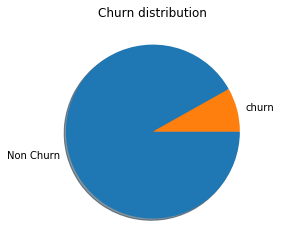

In [36]:
display((telecom_churn_data.groupby('churn')['churn'].count()/len(telecom_churn_data))*100)
plt.pie((telecom_churn_data.groupby('churn')['churn'].count()/len(telecom_churn_data))*100,  labels= ['Non Churn', 'churn'],counterclock=False, shadow=True)
plt.title('Churn distribution')
plt.show()

Number/count  of churn and non churn tagged in the current dataset

From the above information we can find that the data is not balanced. So while modelling we need to use some techniques for balancing of data

In [37]:
display_null_cols()
telecom_churn_data.fillna(0,inplace=True)
display_null_cols()
telecom_churn_data.describe(percentiles=[.2,.3,.4,.5,.6,.7,.8,.9])

arpu_6        arpu_7        arpu_8  total_rech_amt_6  \
count  30001.000000  30001.000000  30001.000000      30001.000000   
mean     558.490824    560.782203    508.597957        660.732342   
std      460.640461    479.776947    501.961981        561.032865   
min    -2258.709000  -2014.045000   -945.808000          0.000000   
20%      267.214000    269.404000    190.594000        307.000000   
30%      347.244000    348.360000    271.339000        405.000000   
40%      417.224000    416.543000    351.806000        493.000000   
50%      481.694000    480.943000    427.585000        566.000000   
60%      551.810000    554.061000    508.976000        653.000000   
70%      641.868000    641.713000    602.052000        760.000000   
80%      768.302000    770.398000    735.931000        916.000000   
90%      994.099000    995.859000    977.345000       1181.000000   
max    27731.088000  35145.834000  33543.624000      35190.000000   

       total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
count      30001.000000      30001.000000    30001.000000    30001.000000   
mean         660.498017        584.365454      169.284824      172.201727   
std          582.430876        611.245907      175.315958      181.390742   
min            0.000000          0.000000        0.000000        0.000000   
20%          302.000000        197.000000       71.000000       67.000000   
30%          400.000000        291.000000      110.000000      110.000000   
40%          487.000000        390.000000      110.000000      120.000000   
50%          562.000000        490.000000      120.000000      128.000000   
60%          652.000000        587.000000      152.000000      152.000000   
70%          760.000000        704.000000      155.000000      169.000000   
80%          920.000000        860.000000      250.000000      250.000000   
90%         1194.000000       1148.000000      274.000000      274.000000   
max        40335.000000      45320.000000     4010.000000     4010.000000   

       max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
count    30001.000000        30001.000000        30001.000000   
mean       160.144462          100.893604          100.356021   
std        173.207799          143.737572          140.925669   
min          0.000000            0.000000            0.000000   
20%         50.000000           20.000000           10.000000   
30%         98.000000           30.000000           25.000000   
40%        130.000000           44.000000           36.000000   
50%        130.000000           67.000000           50.000000   
60%        150.000000          110.000000          110.000000   
70%        164.000000          110.000000          128.000000   
80%        229.000000          128.000000          150.000000   
90%        252.000000          250.000000          250.000000   
max       4449.000000         4010.000000         4010.000000   

       last_day_rch_amt_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8  \
count        30001.000000  30001.000000  30001.000000  30001.000000   
mean            92.393654    126.522185    125.097326    105.913072   
std            145.182324    330.530793    331.548010    313.384838   
min              0.000000      0.000000      0.000000      0.000000   
20%              0.000000      0.000000      0.000000      0.000000   
30%             17.000000      0.000000      0.000000      0.000000   
40%             30.000000      0.000000      0.000000      0.000000   
50%             50.000000      0.000000      0.050000      0.000000   
60%             98.000000     11.420000     11.370000      4.870000   
70%            130.000000     45.060000     44.490000     27.540000   
80%            144.000000    144.210000    137.550000     96.000000   
90%            225.000000    409.790000    399.920000    318.950000   
max           4449.000000  10285.900000   7873.550000  11117.610000   

        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  night_pck_us

Use boxplot to identify the outliers

Text(0.5, 1.0, 'Independent Variables')

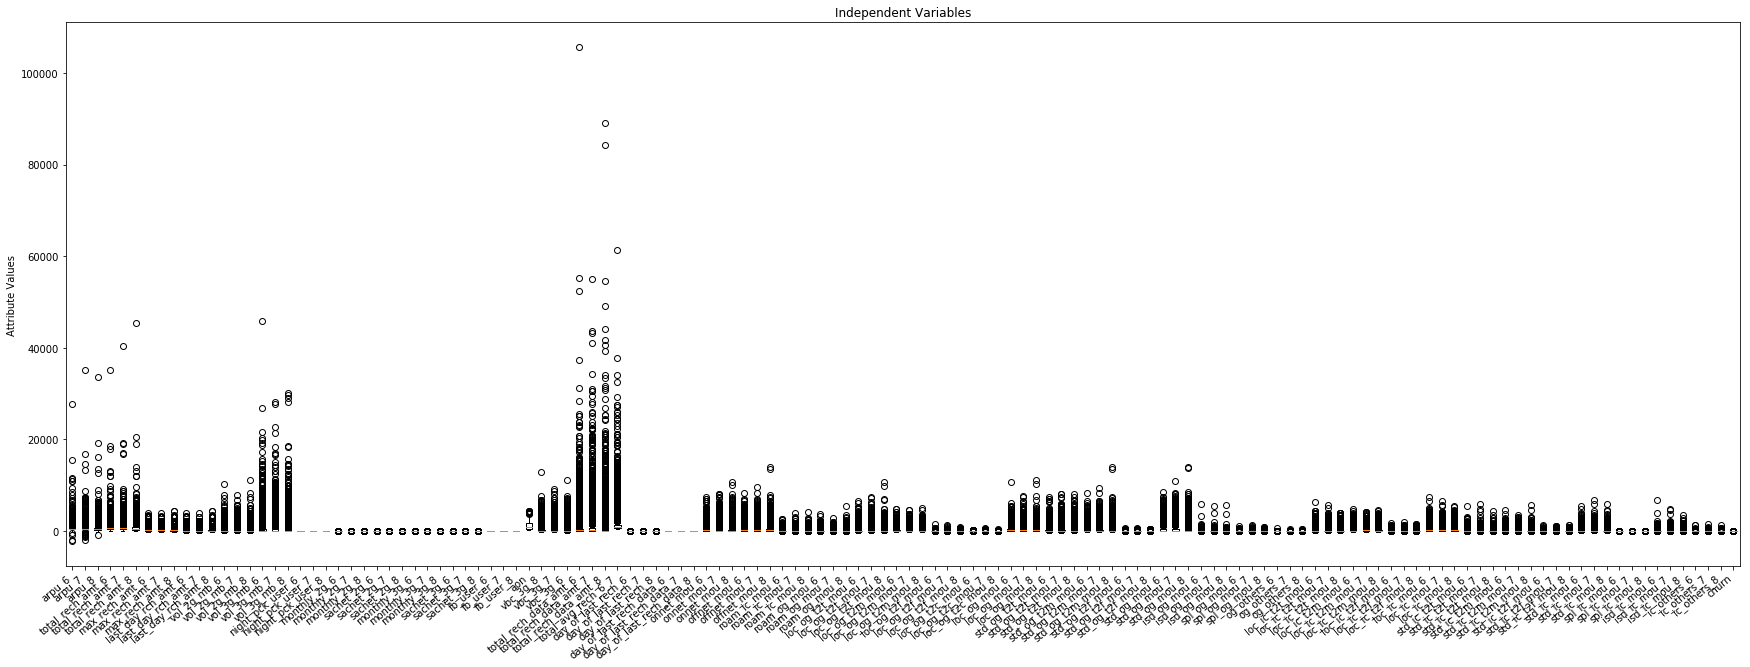

In [38]:

figure = plt.figure(figsize=(30,10))
plot_array2 = telecom_churn_data.iloc[:,:].values
plt.boxplot(plot_array2)
plt.xticks(range(1,len(telecom_churn_data.columns)+1),telecom_churn_data.columns,rotation=40,ha='right')
plt.ylabel(("Attribute Values"))
plt.title('Independent Variables')

From the above graph we can see that there are many outliers. But we will consider to filter outliers for the columns 'total_rech_data_amt_6','total_rech_data_amt_7','total_rech_data_amt_8','total_avg_rech_6_7','arpu_6','arpu_7','arpu_8' using IQR(interquartile range). if we try to remove all the outliers data set becomes very very small close to thousands 

In [39]:
#From above graph we get the outlier columns with high values
outlier_cols = ['total_rech_data_amt_6','total_rech_data_amt_7','total_rech_data_amt_8','total_avg_rech_6_7','arpu_6','arpu_7','arpu_8']
for col in outlier_cols:
  Q1 = telecom_churn_data[col].quantile(0.25)
  Q3 = telecom_churn_data[col].quantile(0.75)
  IQR = Q3 - Q1
  display(telecom_churn_data.shape)
  display(IQR)
  telecom_churn_data = telecom_churn_data[~((telecom_churn_data[col] < (Q1 - 1.5 * IQR)) | (telecom_churn_data[col] > (Q3 + 1.5 * IQR)))]


display(telecom_churn_data.head())
display(telecom_churn_data.shape)

(30001, 132)

400.0

(26390, 132)

358.0

(23604, 132)

175.0

(20684, 132)

353.0

(19532, 132)

329.03225

(19062, 132)

314.34400000000005

(18564, 132)

369.8019999999999

arpu_6   arpu_7   arpu_8  total_rech_amt_6  total_rech_amt_7  \
0  197.385  214.816  213.803               362               252   
2  378.721  492.223  137.362               437               601   
3  514.453  597.753  637.760               600               680   
6  363.987  486.558  393.909               420               636   
7  482.832  425.764  229.769               496               510   

   total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0               252             252             252             252   
2               120              90             154              30   
3               718              50              50              50   
6               416              30             110             130   
7               410             150             150             150   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  vol_2g_mb_6  \
0                 252                 252                 252        30.13   
2                  50                   0                  10         0.00   
3                  30                  20                  50         0.00   
6                  20                  20                 130         0.00   
7                 150                 150                 110         0.00   

   vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  \
0         1.32         5.75        83.57       150.76       109.61   
2       356.00         0.03         0.00       750.95        11.94   
3         0.00         0.00         0.00         0.00         0.00   
6         0.00         0.00         0.00         0.00         0.00   
7         0.00         0.00         0.00         0.00         0.00   

   night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  \
0               0.0               0.0               0.0             0   
2              -1.0               0.0               0.0             0   
3              -1.0              -1.0              -1.0             0   
6              -1.0              -1.0              -1.0             0   
7              -1.0              -1.0              -1.0             0   

   monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  \
0             0             0            0            0            0   
2             1             0            0            1            3   
3             0             0            0            0            0   
6             0             0            0            0            0   
7             0             0            0            0            0   

   monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
0             1             1             1            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
6             0             0             0            0            0   
7             0             0             0            0            0   

   sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  vbc_3g_8  vbc_3g_7  \
0            0        1.0        1.0        1.0   968     30.40      0.00   
2            0       -1.0        1.0        1.0   315     21.03    910.65   
3            0       -1.0       -1.0       -1.0   720      0.00      0.00   
6            0       -1.0       -1.0       -1.0  1155      0.00      0.00   
7            0       -1.0       -1.0       -1.0  2010      0.00      0.00   

   vbc_3g_6  total_rech_data_amt_6  total_rech_data_amt_7  \
0    101.20                  252.0                  252.0   
2    122.16                    0.0                  354.0   
3      0.00                    0.0                    0.0   
6      0.00                    0.0                    0.0   
7      0.00                    0.0                    0.0   

   total_rech_data_amt_8  total_avg_rech_6_7  day_of_last_rech_6  \
0                  252.0               559.0                21.0   
2

(18173, 132)

chrun and non churn distribution after removing outliers

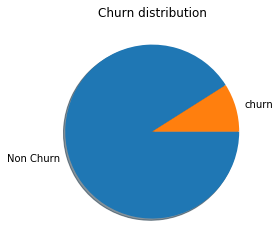

In [40]:
plt.pie((telecom_churn_data.groupby('churn')['churn'].count()/len(telecom_churn_data))*100,  labels= ['Non Churn', 'churn'],counterclock=False, shadow=True)
plt.title('Churn distribution')
plt.show()

In [41]:
good_phase_cols = [col[:-2] for col in telecom_churn_data.columns.values if (col.find("_6")!=-1 or col.find("_7")!=-1) and col.find("total_avg_rech_6_7")<0 and col.find("total_rech_data_amt_8")<0]
good_phase_cols = list(set(good_phase_cols))
for col in good_phase_cols:
  avg_col = "avg_"+col+"_67"
  
  telecom_churn_data[avg_col] = (telecom_churn_data[col+"_6"]  + telecom_churn_data[col+"_7"])/ 2
  telecom_churn_data = telecom_churn_data.drop([col+"_6",col+"_7"],axis="columns")

telecom_churn_data.shape

(18173, 89)

In [42]:
telecom_churn_data.describe()

arpu_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
count  18173.000000      18173.000000    18173.000000        18173.000000   
mean     428.317738        490.941727      143.264954           85.029659   
std      259.235232        325.416466      127.707447          113.430203   
min      -72.220000          0.000000        0.000000            0.000000   
25%      236.974000        252.000000       61.000000            0.000000   
50%      415.761000        474.000000      130.000000           50.000000   
75%      597.575000        700.000000      154.000000          130.000000   
max     1165.601000       4449.000000     4449.000000         4449.000000   

        vol_2g_mb_8   vol_3g_mb_8  night_pck_user_8  monthly_2g_8  \
count  18173.000000  18173.000000      18173.000000  18173.000000   
mean      60.673260    123.042821         -0.626534      0.127387   
std      214.007048    336.127816          0.494093      0.333745   
min        0.000000      0.000000         -1.000000      0.000000   
25%        0.000000      0.000000         -1.000000      0.000000   
50%        0.000000      0.000000         -1.000000      0.000000   
75%        5.270000      0.000000          0.000000      0.000000   
max     3947.900000   4478.240000          1.000000      2.000000   

        sachet_2g_8  monthly_3g_8   sachet_3g_8     fb_user_8           aon  \
count  18173.000000  18173.000000  18173.000000  18173.000000  18173.000000   
mean       0.300501      0.074341      0.029659     -0.326748   1260.731030   
std        0.823052      0.263588      0.225129      0.910893    976.329543   
min        0.000000      0.000000      0.000000     -1.000000    180.000000   
25%        0.000000      0.000000      0.000000     -1.000000    476.000000   
50%        0.000000      0.000000      0.000000     -1.000000    905.000000   
75%        0.000000      0.000000      0.000000      1.000000   1921.000000   
max        9.000000      3.000000      8.000000      1.000000   4235.000000   

           vbc_3g_8  total_rech_data_amt_8  total_avg_rech_6_7  \
count  18173.000000           18173.000000        18173.000000   
mean      83.067382              61.395779          716.891123   
std      243.274054             100.589748          202.225749   
min        0.000000               0.000000          478.000000   
25%        0.000000               0.000000          554.500000   
50%        0.000000               0.000000          661.000000   
75%        0.000000             145.000000          831.000000   
max     4094.140000             432.000000         1448.000000   

       day_of_last_rech_8  day_of_last_rech_data_8   onnet_mou_8  \
count        18173.000000             18173.000000  18173.000000   
mean            25.779288                 6.323942    241.506448   
std              6.704543                 9.784819    381.923845   
min              0.000000                 0.000000      0.000000   
25%             25.000000                 0.000000     21.490000   
50%             28.000000                 0.000000     88.280000   
75%             30.000000                12.000000    281.390000   
max             31.000000                31.000000   6723.790000   

       offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
count  18173.000000   18173.000000   18173.000000      18173.000000   
mean     327.206945      11.376935      16.327537         78.037479   
std      352.819202      70.287816      66.516930        197.933905   
min        0.000000       0.000000       0.000000          0.000000   
25%       75.480000       0.000000       0.000000          4.790000   
50%      218.230000       0.000000       0.000000         25.130000   
75%      457.490000       0.000000       0.000000         76.930000   
max     3252.590000    4169.810000    1335.880000       6723.790000   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
count      18173.000000      18173.000000      18173.000000 

(18173, 19)

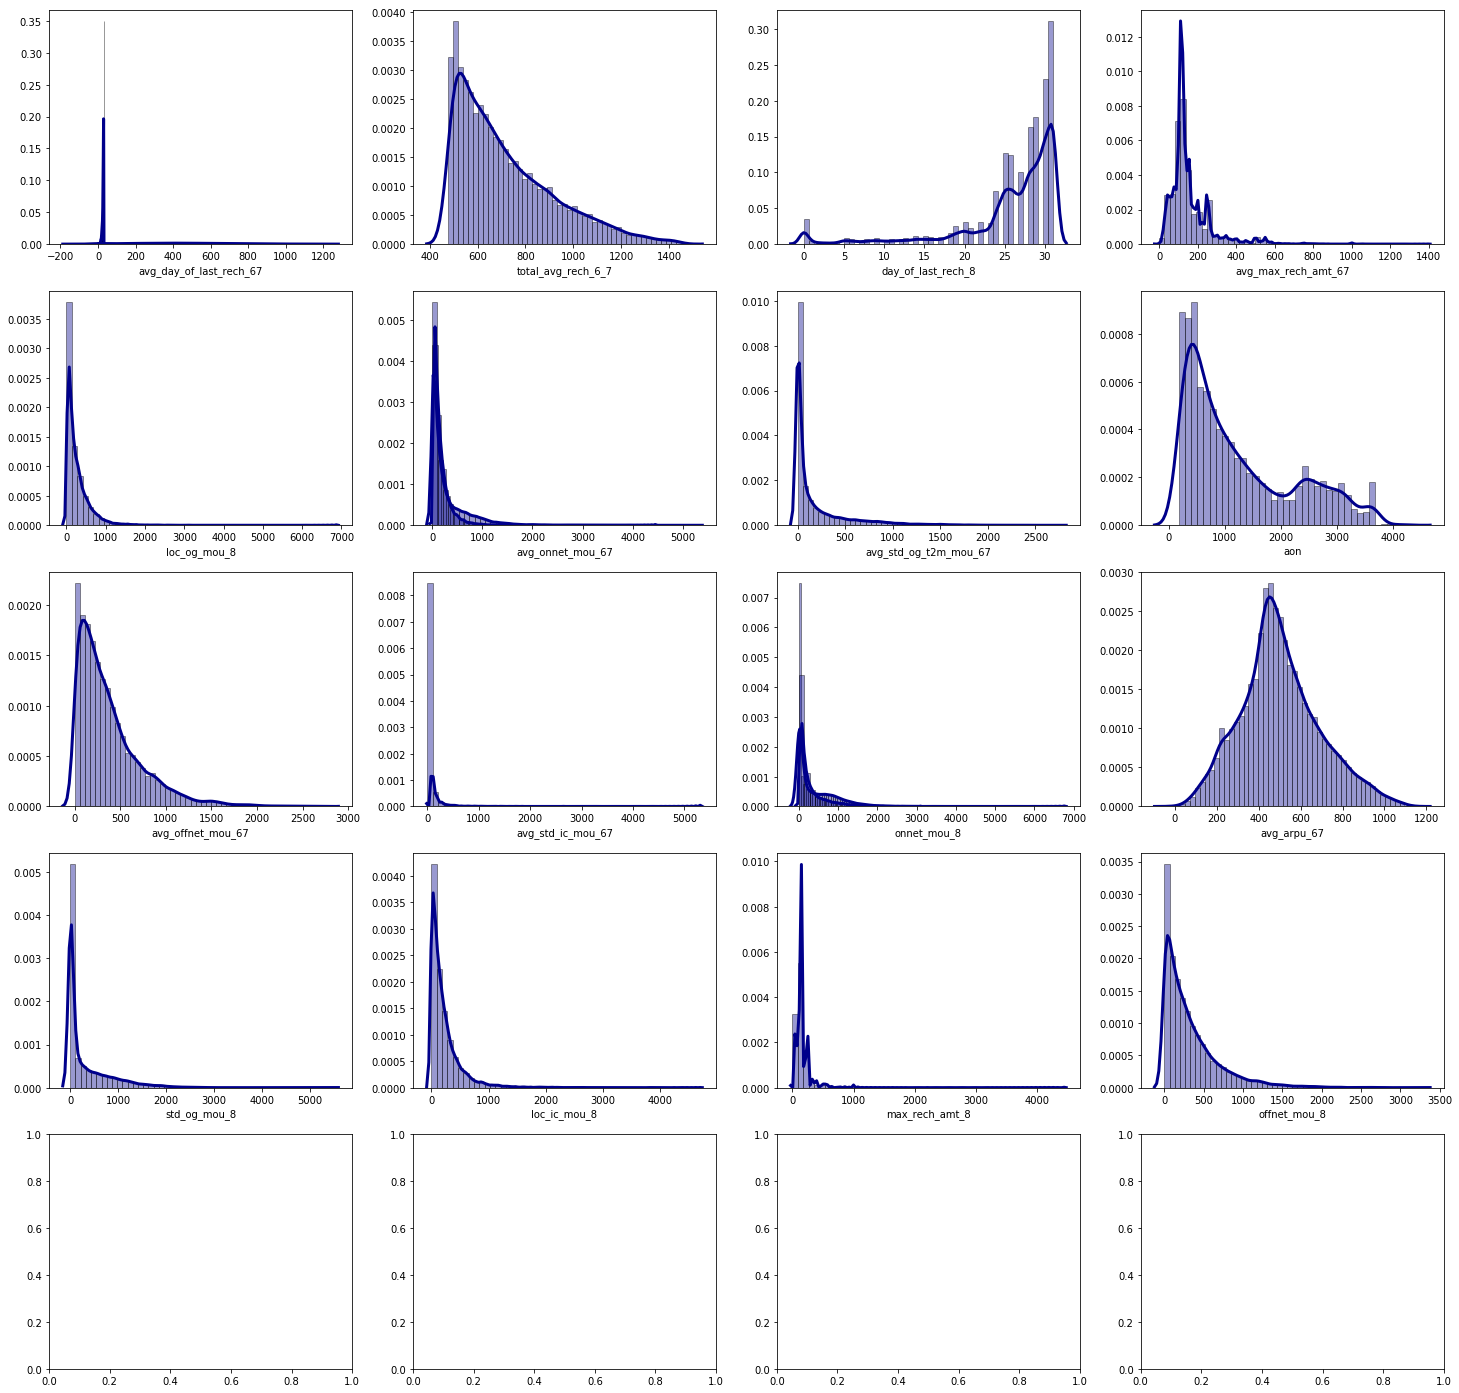

In [45]:
telecom_churn_data.fillna(0,inplace=True)
# Density Plot and Histogram of all columns
fig, axes = plt.subplots(5, 4, figsize=(25, 25))
df = telecom_churn_data[['arpu_8','total_avg_rech_6_7','day_of_last_rech_8','avg_max_rech_amt_67','avg_day_of_last_rech_67','avg_loc_ic_t2m_mou_67','avg_std_og_t2m_mou_67',
                         'aon','loc_og_mou_8','avg_onnet_mou_67','avg_std_og_mou_67','avg_arpu_67','avg_offnet_mou_67','avg_std_ic_mou_67','onnet_mou_8','offnet_mou_8','std_og_mou_8','loc_ic_mou_8','max_rech_amt_8']]
display(df.shape)
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//5,i%4],hist=True, kde=True, label=column, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})

In [0]:
telecom_churn_data['avg_rech_aon'] = (telecom_churn_data['total_avg_rech_6_7'] + telecom_churn_data['total_rech_data_amt_8'] + telecom_churn_data['total_rech_amt_8']) // telecom_churn_data['aon']
telecom_churn_data.drop(['total_rech_amt_8'], axis=1, inplace=True)

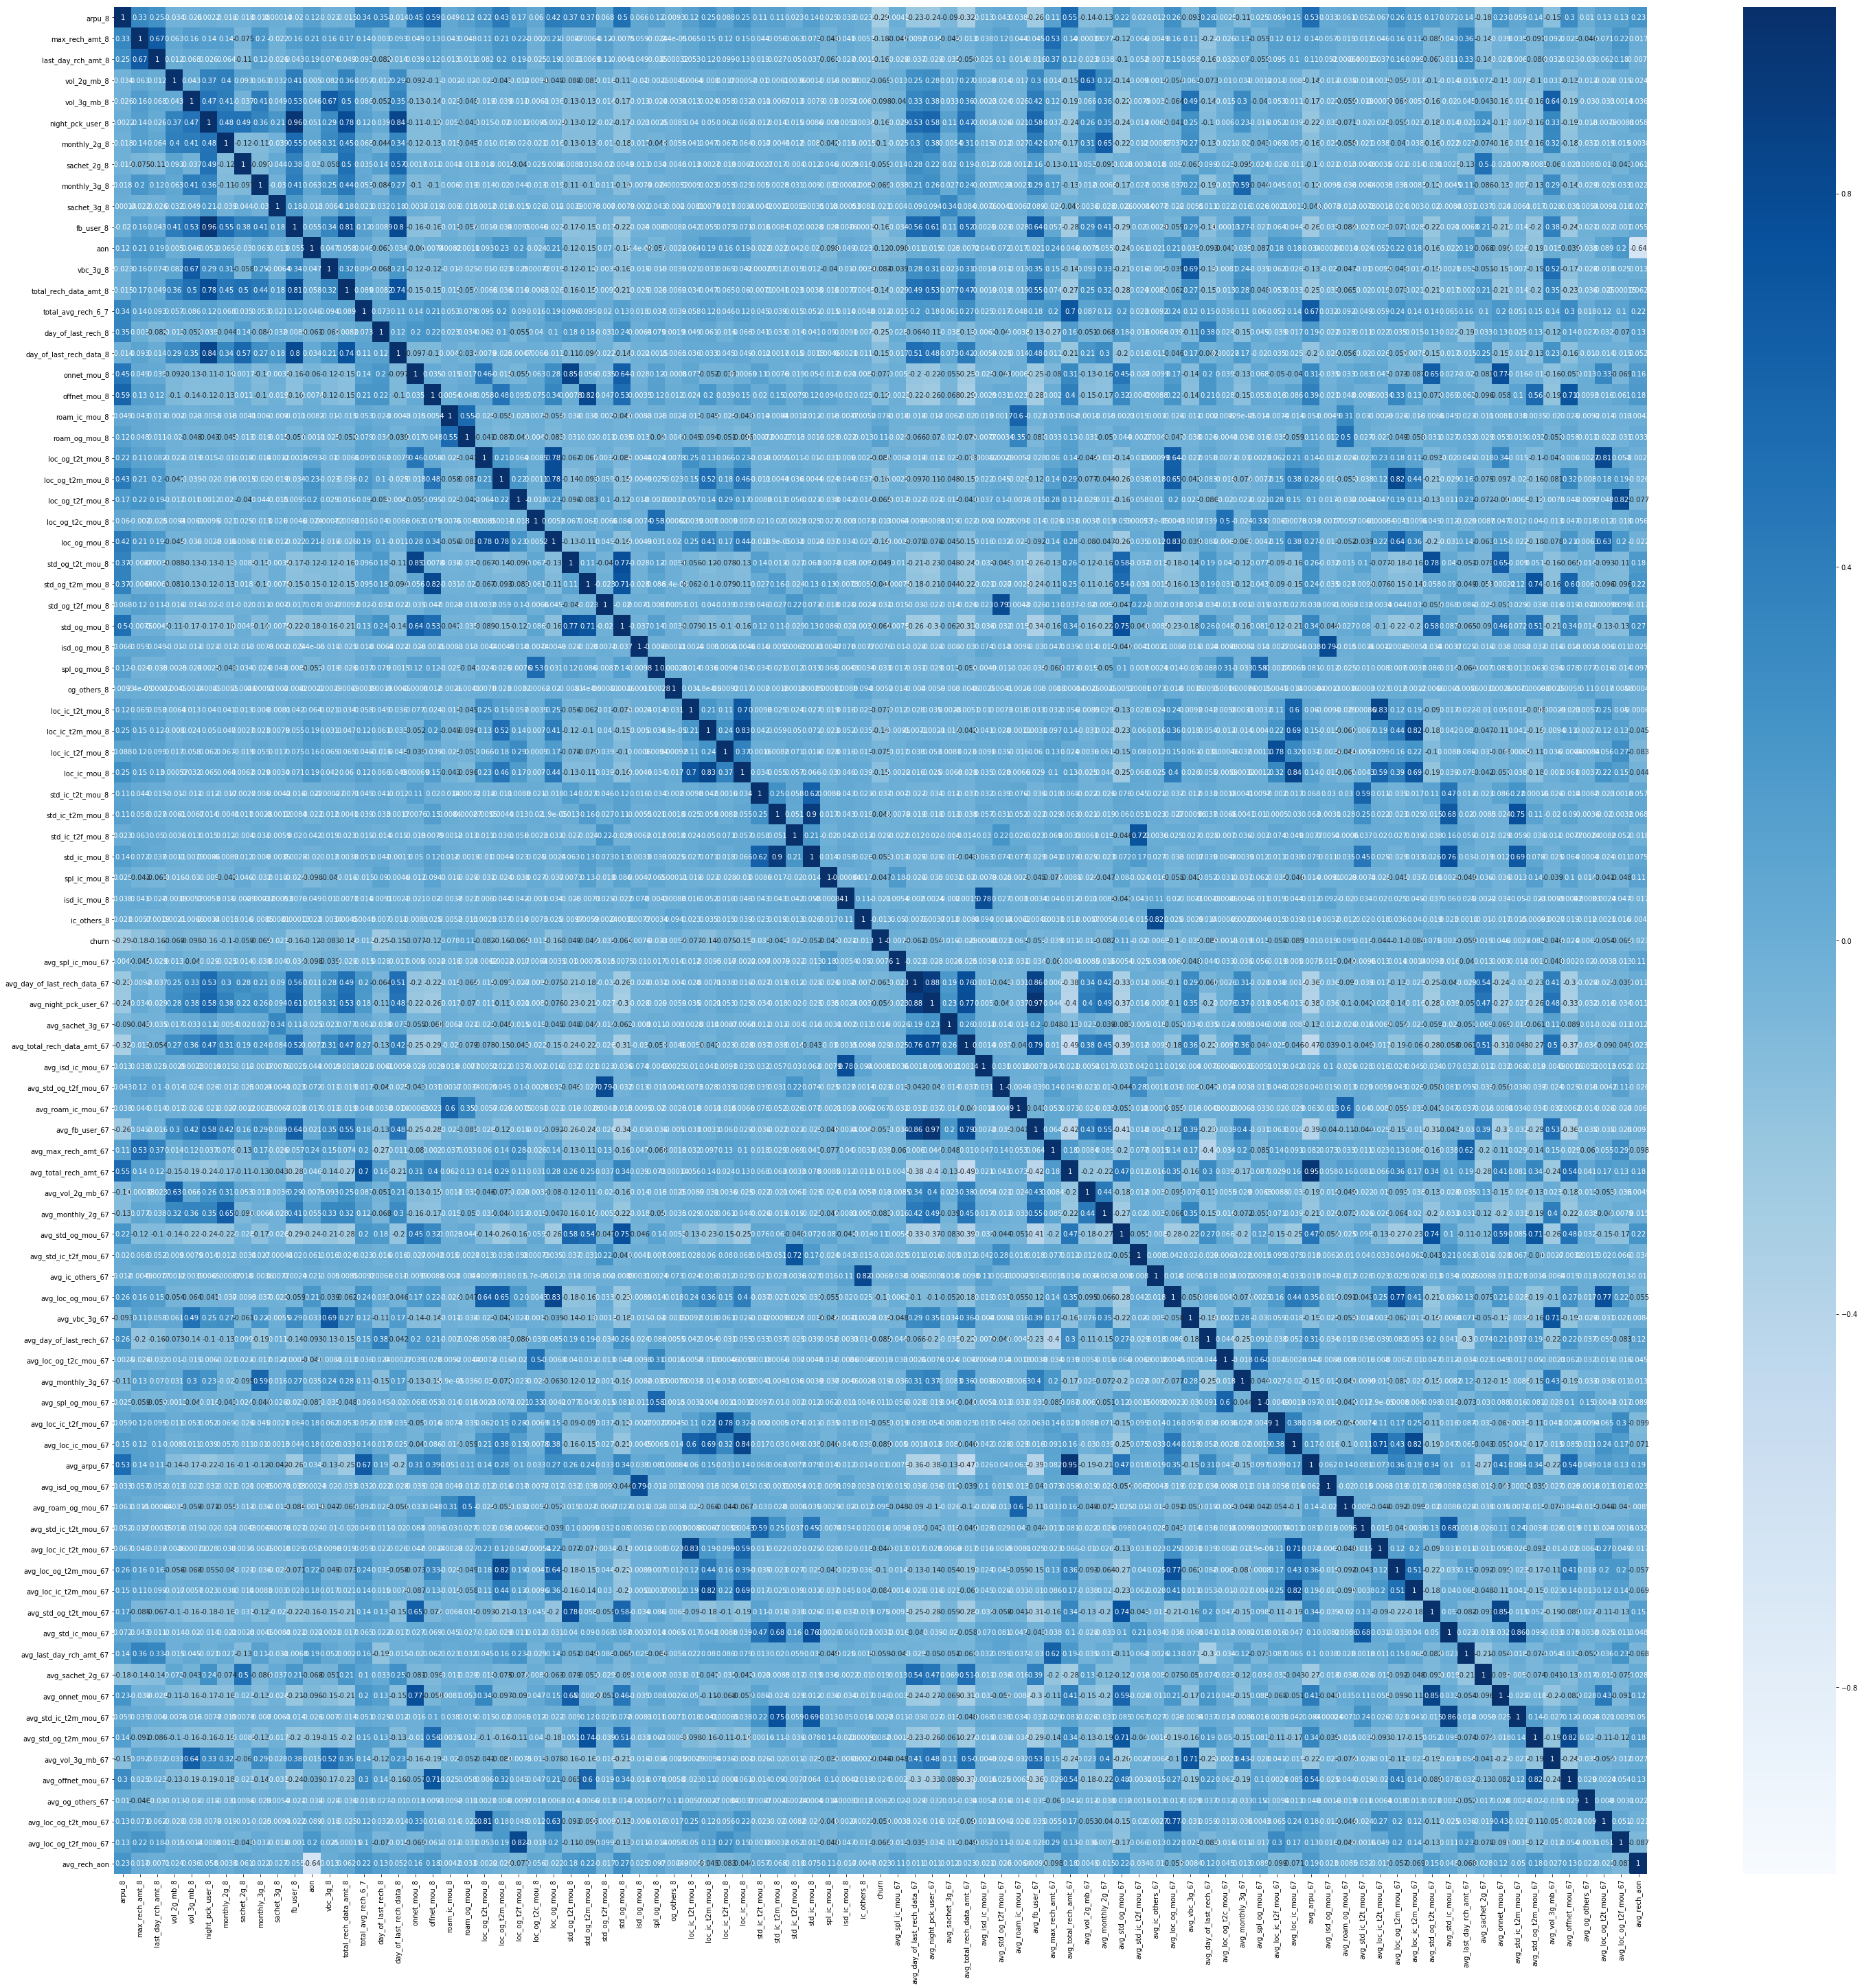

In [47]:
plt.figure(figsize=(50,50))
cols = [col for col in telecom_churn_data if telecom_churn_data[col].nunique() > 1]
ax = sns.heatmap(telecom_churn_data[cols].corr(),
            vmin=-1,
            vmax=1,
            cmap='Blues',
            annot=True)
plt.yticks(rotation=0)

plt.show()

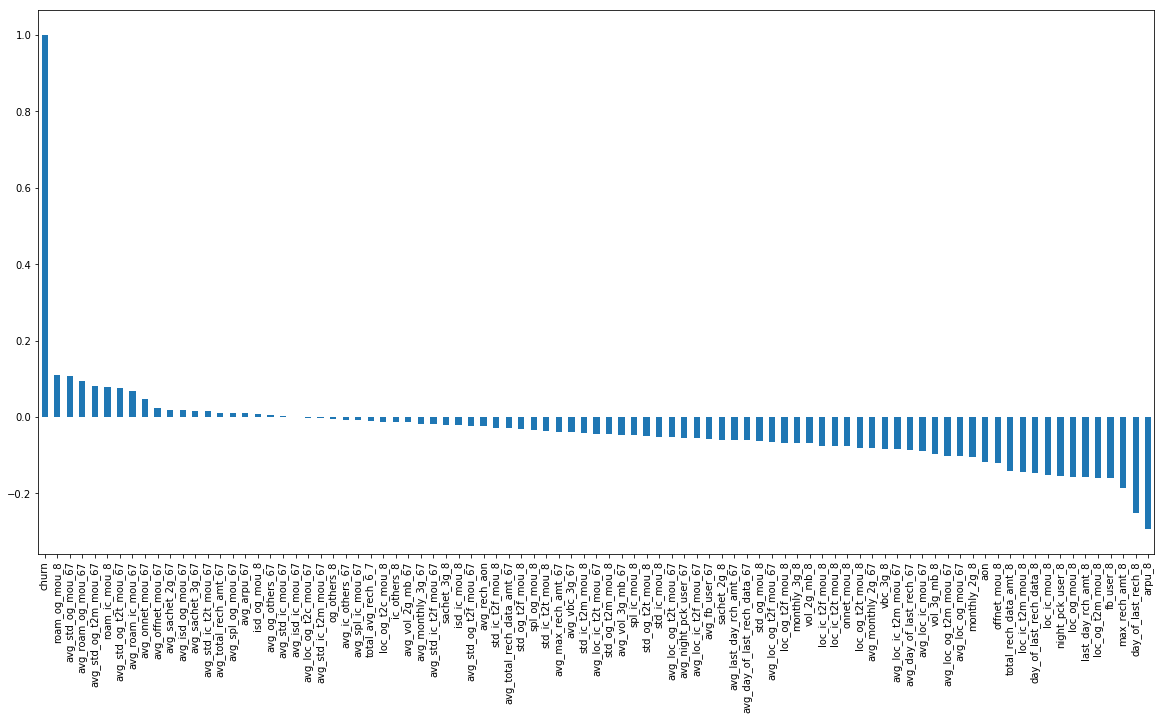

In [48]:
plt.figure(figsize=(20,10))
telecom_churn_data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
telecom_churn_data['churn'] = pd.Categorical(telecom_churn_data.churn)

###Normalization of data

In [0]:
# Putting feature variable to X
X = telecom_churn_data.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_churn_data['churn']

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [0]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

display("Number churn X_train dataset: ", X_train.shape)
display("Number churn y_train dataset: ", y_train.shape)
display("Number churn X_test dataset: ", X_test.shape)
display("Number churn y_test dataset: ", y_test.shape)

'Number churn X_train dataset: '

(12721, 88)

'Number churn y_train dataset: '

(12721,)

'Number churn X_test dataset: '

(5452, 88)

'Number churn y_test dataset: '

(5452,)

In [58]:
#Since churned rows are of less sample using the SMOTE oversampling we will balance the class as seen below
display("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
display("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2,kind = "regular")
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

display('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
display('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

display("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
display("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

"Before OverSampling, counts of label '1': 1101"

"Before OverSampling, counts of label '0': 11620 \n"

'After OverSampling, the shape of X_train: (23240, 88)'

'After OverSampling, the shape of y_train: (23240,) \n'

"After OverSampling, counts of label '1': 11620"

"After OverSampling, counts of label '0': 11620"

###Model Building

In [0]:
#function which plots the grap of mean_train_score and mean_test_score against accuracy for given hypertuning parameter
def plot_accuracy(param_name, scores):
  # plotting accuracies
  plt.figure()
  plt.plot(scores["param_"+param_name], 
           scores["mean_train_score"], 
           label="training accuracy")
  plt.plot(scores["param_"+param_name], 
           scores["mean_test_score"], 
           label="test accuracy")
  plt.xlabel(param_name)
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

####Using SVM

In [60]:
svm_model = svm.SVC(gamma=0.01, C=1, kernel = 'linear')
svm_model.fit(X_train_res, y_train_res)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

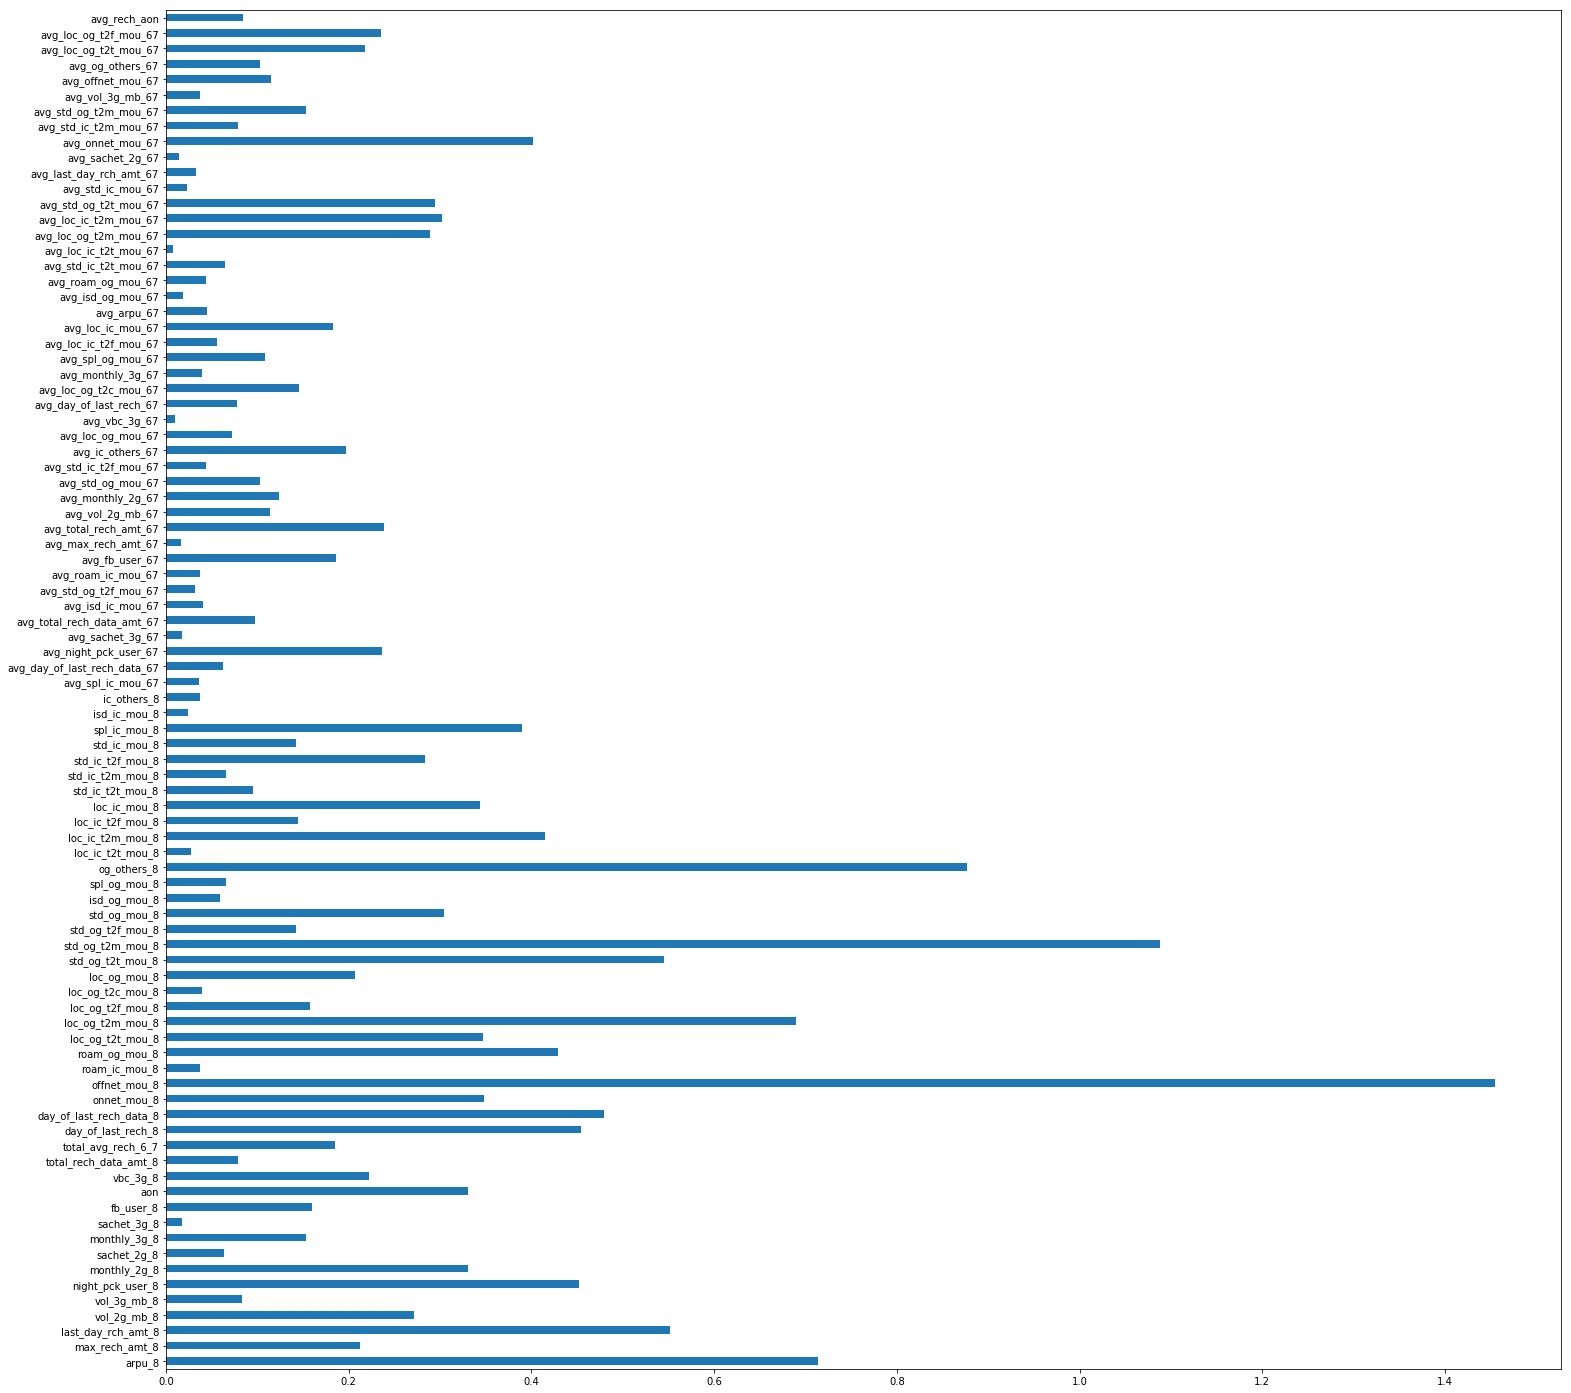

In [61]:
pd.Series(abs(svm_model.coef_[0]), index=telecom_churn_data.drop(['churn'],axis=1).columns).plot(kind='barh',figsize=(25,25))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      4921
           1       0.34      0.82      0.48       531

    accuracy                           0.83      5452
   macro avg       0.66      0.83      0.69      5452
weighted avg       0.92      0.83      0.86      5452

Accuracy of SVM Model on test set is  0.8294203961848863


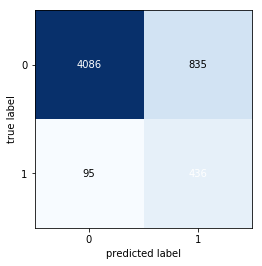

In [62]:
y_pred = svm_model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM Model on test set is ',metrics.accuracy_score(y_test, y_pred))

####RFE

In [0]:
rlr = LogisticRegression(class_weight={0:.1, 1:.9},C=100)
rfe = RFE(rlr, 25)   
rfe = rfe.fit(X_train_res,y_train_res)

In [64]:
df = telecom_churn_data.drop('churn',axis=1)
rfe_features = list(df.columns[rfe.support_])
display("Features given by RFE ", rfe_features)
X_rfe = pd.DataFrame(data=X_train_res).iloc[:, rfe.support_]
y_rfe = y_train_res

'Features given by RFE '

['arpu_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'aon',
 'vbc_3g_8',
 'total_avg_rech_6_7',
 'day_of_last_rech_8',
 'day_of_last_rech_data_8',
 'offnet_mou_8',
 'roam_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'og_others_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'spl_ic_mou_8',
 'avg_night_pck_user_67',
 'avg_ic_others_67',
 'avg_spl_og_mou_67',
 'avg_loc_ic_t2t_mou_67',
 'avg_loc_ic_t2m_mou_67']

In [65]:
rfe_lr = LogisticRegression(class_weight={0:.1, 1:.9}, C=100, random_state=1)
rfe_lr.fit(X_rfe, y_rfe)

LogisticRegression(C=100, class_weight={0: 0.1, 1: 0.9}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.99      0.43      0.60      4921
           1       0.15      0.97      0.27       531

    accuracy                           0.48      5452
   macro avg       0.57      0.70      0.43      5452
weighted avg       0.91      0.48      0.57      5452

Accuracy of Logistic Regression Model on test set is  0.4811078503301541


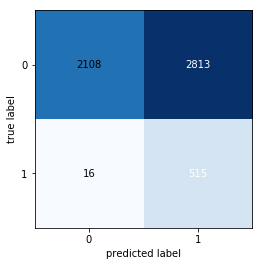

In [66]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = rfe_lr.predict(X_test_rfe)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of Logistic Regression Model on test set is ',metrics.accuracy_score(y_test, y_pred))


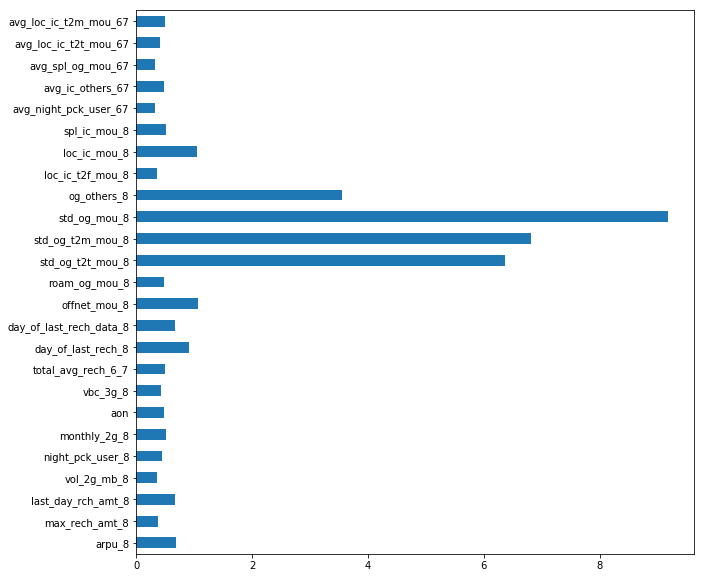

In [67]:
pd.Series( abs(rfe_lr.coef_[0]), index=rfe_features).plot(kind='barh',figsize=(10,10))

Summary using Logistic regression with RFE

Model accuracy  is only 44%
Confusion matix indicates that it has high false positive rates

####Using PCA

In [0]:
#Improting the PCA module
pca = PCA(svd_solver='randomized', random_state=42)

In [69]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

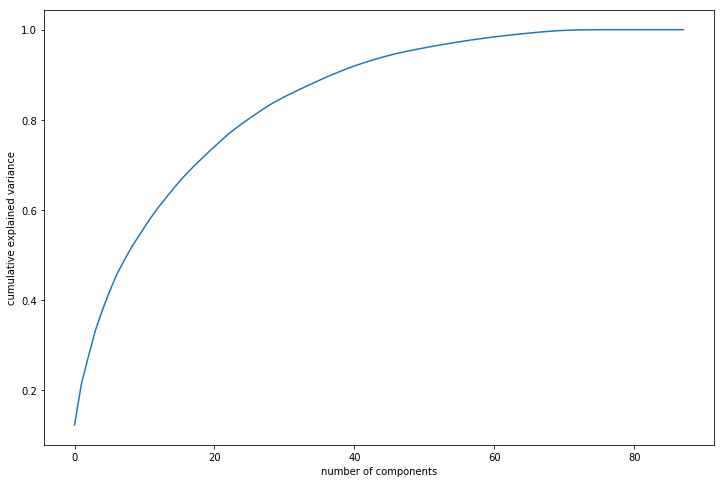

In [70]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the above graph we can see that with above 40 components we can explain the variation ratio upto 90%.
So we will start using 40 components to build the model with PCA

In [71]:
#Using incremental PCA for efficiency 
# number of components
n_components = 40
pca_final = IncrementalPCA(n_components=n_components)
#Doing the PCA on the train data
pca_final.fit(X_train_res)

IncrementalPCA(batch_size=None, copy=True, n_components=40, whiten=False)

In [72]:
df_train_pca = pca_final.fit_transform(X_train_res)
df_train_pca.shape

(23240, 40)

In [73]:
#Applying selected components to the test data - n_components components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5452, 40)

In [74]:
#Training the model on the train data
folds= 5

lr_pca = LogisticRegression(class_weight="balanced")
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model_cv = GridSearchCV(estimator = lr_pca, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        return_train_score=True,n_jobs = -1,verbose = 1)            
model_cv.fit(X_train_res, y_train_res) 
model_pca = lr_pca.fit(df_train_pca,y_train_res)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.3min finished


In [75]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.317012      0.057658         0.014650        0.002824   0.001   
1       0.671599      0.050448         0.008649        0.004443   0.001   
2       0.780791      0.099113         0.009400        0.008722    0.01   
3       1.151164      0.107353         0.004451        0.004366    0.01   
4       2.401520      1.011708         0.004676        0.003128     0.1   

  param_penalty                         params  split0_test_score  \
0            l1  {'C': 0.001, 'penalty': 'l1'}           0.781842   
1            l2  {'C': 0.001, 'penalty': 'l2'}           0.822074   
2            l1   {'C': 0.01, 'penalty': 'l1'}           0.832186   
3            l2   {'C': 0.01, 'penalty': 'l2'}           0.834552   
4            l1    {'C': 0.1, 'penalty': 'l1'}           0.835843   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.797547           0.787005           0.793675           0.788511   
1           0.836059           0.834983           0.838425           0.837134   
2           0.842298           0.844449           0.845095           0.846601   
3           0.843158           0.846601           0.847031           0.851119   
4           0.846170           0.849828           0.844880           0.854776   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.789716        0.005437               14            0.791631   
1         0.833735        0.005941               13            0.837188   
2         0.842126        0.005159               12            0.845633   
3         0.844492        0.005575               11            0.849075   
4         0.846299        0.006256                9            0.852141   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.787812            0.790286            0.791147   
1            0.834068            0.834284            0.833262   
2            0.843212            0.842567            0.842728   
3            0.845955            0.844073            0.844987   
4            0.847676            0.846816            0.848107   

   split4_train_score  mean_train_score  std_train_score  
0            0.787920          0.789759         0.001605  
1            0.832455          0.834251         0.001604  
2            0.841114          0.843051         0.001468  
3            0.842513          0.845321         0.002193  
4            0.844611          0.847870         0.002452

In [76]:
# printing the optimal accuracy score and hyperparameters
display('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

'We can get accuracy of'

0.8472891566265061

'using'

{'C': 10.0, 'penalty': 'l1'}

In [0]:
lr_pca = LogisticRegression(class_weight="balanced",C=model_cv.best_params_['C'],penalty=model_cv.best_params_['penalty'])      
lr_pca.fit(X_train_res, y_train_res) 
model_pca = lr_pca.fit(df_train_pca,y_train_res)

In [78]:
df = (pd.DataFrame(pca_final.components_,columns=telecom_churn_data.columns[:-1],index = list(["PC-1"+str(x) for x in range(1,n_components+1)])))
df.head()


arpu_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  \
PC-11  0.090785       -0.026195           -0.016511    -0.080539    -0.123404   
PC-12  0.253177        0.177901            0.140125     0.026769     0.050382   
PC-13 -0.061826        0.031102            0.042098    -0.055992    -0.064993   
PC-14  0.208709        0.146056            0.076027     0.079611     0.111597   
PC-15 -0.011633       -0.016655           -0.024728     0.013087     0.000128   

       night_pck_user_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
PC-11         -0.164509     -0.105720    -0.061644     -0.091955    -0.032104   
PC-12          0.089494      0.056412     0.030380      0.034886     0.011270   
PC-13         -0.138180     -0.052653    -0.100935     -0.028594    -0.045287   
PC-14          0.201776      0.088482     0.107397      0.079725     0.046710   
PC-15          0.027043      0.002934     0.035442     -0.005411     0.012338   

       fb_user_8       aon  vbc_3g_8  total_rech_data_amt_8  \
PC-11  -0.180585 -0.042372 -0.102965              -0.166361   
PC-12   0.085227  0.127597  0.049488               0.071429   
PC-13  -0.129555  0.091476 -0.038239              -0.113108   
PC-14   0.193266 -0.014769  0.085984               0.168387   
PC-15   0.024525 -0.024613 -0.001534               0.020781   

       total_avg_rech_6_7  day_of_last_rech_8  day_of_last_rech_data_8  \
PC-11            0.032023            0.062345                -0.135666   
PC-12            0.143754            0.089180                 0.076932   
PC-13           -0.069305           -0.118539                -0.124313   
PC-14            0.156056            0.209948                 0.178137   
PC-15            0.001940            0.011849                 0.027922   

       onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
PC-11     0.123143      0.110410       0.036220       0.066683   
PC-12     0.082848      0.168286      -0.056473      -0.063145   
PC-13    -0.128075     -0.052350       0.363182       0.271762   
PC-14     0.108137      0.068325       0.355145       0.287284   
PC-15    -0.290440      0.274715      -0.003939      -0.005403   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
PC-11          0.002543         -0.007094         -0.022076          0.014478   
PC-12          0.155624          0.244251          0.106822          0.020606   
PC-13          0.015250          0.055751          0.053482         -0.040780   
PC-14         -0.029521         -0.061729         -0.032016          0.033113   
PC-15         -0.136654          0.039414          0.007600         -0.009780   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
PC-11     -0.004068          0.131436          0.123871         -0.005252   
PC-12      0.259342          0.008279          0.035791          0.039894   
PC-13      0.047843         -0.173788         -0.132476          0.025172   
PC-14     -0.059547          0.116946          0.081523         -0.004481   
PC-15     -0.062162         -0.240759          0.282150          0.019311   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
PC-11      0.171791      0.001624      0.023311    -0.000062   
PC-12      0.029653      0.017914      0.038519     0.003647   
PC-13     -0.206685      0.028435     -0.070577    -0.000205   
PC-14      0.134483     -0.014527      0.022995    -0.001349   
PC-15      0.011509      0.011263     -0.001071     0.000344   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
PC-11         -0.022924         -0.035214         -0.036637     -0.041821   
PC-12          0.150669          0.229813          0.114819      0.255324   
PC-13          0.023149          0.044164          0.027767      0.046757   
PC-14         -0.041172         -0.063866         -0.027336     -0.069907   
PC-15         -0.069922          0.014428         -0.005918     -0.028850   

       std_ic_t2

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      4921
           1       0.33      0.80      0.46       531

    accuracy                           0.82      5452
   macro avg       0.65      0.81      0.68      5452
weighted avg       0.91      0.82      0.85      5452

Accuracy of Logistic Regression Model with PCA on test set is  0.8204328686720469


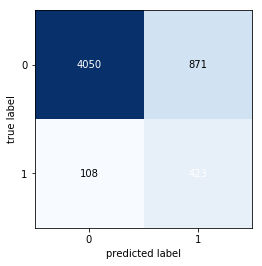

In [79]:
y_pred = model_pca.predict(df_test_pca)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of Logistic Regression Model with PCA on test set is ',metrics.accuracy_score(y_test, y_pred))


In [80]:

# get the index of the most important feature on EACH component
n_pcs= pca_final.components_.shape[0]
important_feature_in_pc = [np.abs(pca_final.components_[i]).argmax() for i in range(n_pcs)]
# get the names
important_feature_in_pc_names = [df.columns.values[important_feature_in_pc[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): important_feature_in_pc_names[i] for i in range(n_pcs)}

# build the dataframe
feature_pcas = pd.DataFrame(dic.items())
feature_pcas.head(10)

0                      1
0   PC1      avg_monthly_2g_67
1   PC2           loc_og_mou_8
2   PC3  avg_std_og_t2f_mou_67
3   PC4          roam_ic_mou_8
4   PC5  avg_std_ic_t2m_mou_67
5   PC6         avg_fb_user_67
6   PC7  avg_std_og_t2t_mou_67
7   PC8            avg_arpu_67
8   PC9     total_avg_rech_6_7
9  PC10           spl_og_mou_8

With PCA it shows that the accuracy improved from 48% to 82%

####Model with RandomForestClassifier

In [81]:
# GridSearchCV to find optimal n_estimators


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth':  range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier( class_weight='balanced',
                                              criterion='gini', random_state = 100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,n_jobs = -1,verbose = 1,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
           

In [82]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.308436      0.047383         0.007096        0.000988   
1       0.804552      0.060972         0.009087        0.001124   
2       1.274345      0.065406         0.012337        0.000281   
3       1.424127      0.088680         0.011604        0.001255   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.828528           0.863812   
1               7   {'max_depth': 7}           0.881885           0.911575   
2              12  {'max_depth': 12}           0.919320           0.946644   
3              17  {'max_depth': 17}           0.920181           0.957616   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.861015           0.858864           0.864028         0.855250   
1           0.916308           0.920826           0.913296         0.908778   
2           0.951162           0.951592           0.948580         0.943460   
3           0.961059           0.963425           0.959122         0.952281   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.013496                4            0.860531            0.856766   
1        0.013808                3            0.930077            0.919374   
2        0.012203                2            0.980153            0.972623   
3        0.016167                1            0.991340            0.989942   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.856713            0.856551            0.852732   
1            0.917760            0.922494            0.919535   
2            0.972784            0.975904            0.973698   
3            0.990211            0.989619            0.989727   

   mean_train_score  std_train_score  
0          0.856659         0.002467  
1          0.921848         0.004389  
2          0.975032         0.002815  
3          0.990168         0.000620

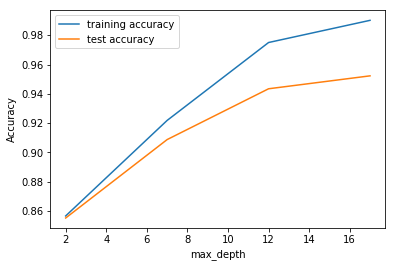

In [83]:
plot_accuracy("max_depth", scores)

In [84]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10,100,10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight='balanced',
                                              criterion='gini', random_state = 100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,n_jobs = -1,verbose = 1,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   34.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             i

In [85]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.606868      0.006680         0.009245        0.000166   
1       1.153007      0.017451         0.014864        0.001145   
2       1.691856      0.012435         0.020343        0.000985   
3       2.248154      0.010006         0.025585        0.000614   
4       2.816490      0.029375         0.030754        0.000514   

  param_n_estimators                params  split0_test_score  \
0                 10  {'n_estimators': 10}           0.862306   
1                 20  {'n_estimators': 20}           0.864458   
2                 30  {'n_estimators': 30}           0.862522   
3                 40  {'n_estimators': 40}           0.862091   
4                 50  {'n_estimators': 50}           0.861876   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.888124           0.886618           0.888985           0.887048   
1           0.890060           0.892427           0.892212           0.889845   
2           0.889845           0.889415           0.890706           0.887909   
3           0.890275           0.886833           0.890491           0.886833   
4           0.889845           0.885542           0.889415           0.887048   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.882616        0.010189                9            0.893772   
1         0.885800        0.010724                1            0.895224   
2         0.884079        0.010817                2            0.893718   
3         0.883305        0.010725                5            0.891459   
4         0.882745        0.010552                8            0.892696   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.884520            0.883713            0.883014   
1            0.887425            0.888662            0.885704   
2            0.885919            0.885112            0.884466   
3            0.885865            0.885058            0.882476   
4            0.885004            0.884359            0.883068   

   split4_train_score  mean_train_score  std_train_score  
0            0.885112          0.886026         0.003937  
1            0.888393          0.889081         0.003241  
2            0.886510          0.887145         0.003359  
3            0.883014          0.885574         0.003198  
4            0.882960          0.885617         0.003623

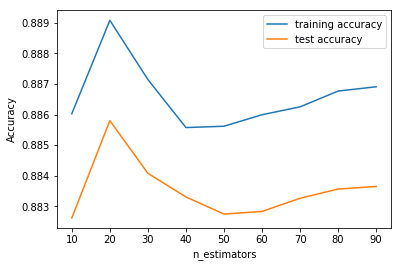

In [86]:
plot_accuracy("n_estimators", scores)

In [87]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight='balanced',
                                              criterion='gini', random_state = 100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,n_jobs = -1,verbose = 1,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             i

In [88]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.325416      0.002350         0.009430        0.000419   
1       0.551497      0.006223         0.009285        0.000313   
2       0.864019      0.006061         0.010278        0.001622   
3       1.192228      0.007341         0.008927        0.000193   
4       1.287695      0.103987         0.007577        0.001052   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.834768   
1                  8   {'max_features': 8}           0.853485   
2                 14  {'max_features': 14}           0.864028   
3                 20  {'max_features': 20}           0.859725   
4                 24  {'max_features': 24}           0.861876   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.876721           0.872633           0.871988           0.875430   
1           0.880809           0.880379           0.882745           0.884036   
2           0.888554           0.881239           0.892642           0.889415   
3           0.886188           0.875430           0.881670           0.879733   
4           0.883391           0.881239           0.888124           0.882745   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.866308        0.015866                5            0.881293   
1         0.876291        0.011479                4            0.884520   
2         0.883176        0.010275                1            0.891512   
3         0.876549        0.009095                3            0.887478   
4         0.879475        0.009096                2            0.889415   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.871289            0.866340            0.867040   
1            0.878819            0.877367            0.879626   
2            0.880917            0.883229            0.886618   
3            0.878173            0.879518            0.880056   
4            0.880271            0.880379            0.881938   

   split4_train_score  mean_train_score  std_train_score  
0            0.868384          0.870869         0.005481  
1            0.880755          0.880217         0.002418  
2            0.885542          0.885564         0.003565  
3            0.876829          0.880411         0.003707  
4            0.879303          0.882261         0.003675

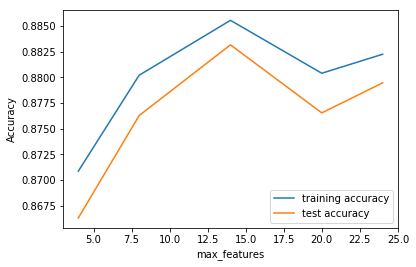

In [89]:
plot_accuracy("max_features", scores)

In [90]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier( class_weight='balanced',
                                              criterion='gini', random_state = 100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,n_jobs = -1,verbose = 1,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
           

In [91]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.000827      0.020933         0.010912        0.000322   
1       0.922047      0.012881         0.010802        0.000911   
2       0.853327      0.006673         0.010447        0.000201   
3       0.798024      0.005449         0.010366        0.000382   
4       0.761851      0.008344         0.010280        0.000467   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.867900   
1                    150  {'min_samples_leaf': 150}           0.866824   
2                    200  {'min_samples_leaf': 200}           0.865749   
3                    250  {'min_samples_leaf': 250}           0.857143   
4                    300  {'min_samples_leaf': 300}           0.860155   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.898021           0.900387           0.903614           0.901678   
1           0.898021           0.891997           0.896299           0.892857   
2           0.893287           0.893718           0.891566           0.893072   
3           0.895009           0.890275           0.891997           0.892427   
4           0.888554           0.885542           0.888769           0.890491   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.894320        0.013334                1            0.910553   
1         0.889200        0.011402                2            0.907218   
2         0.887478        0.010889                3            0.901786   
3         0.885370        0.014195                4            0.894363   
4         0.882702        0.011386                5            0.894578   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.898935            0.899312            0.899849   
1            0.892803            0.891297            0.891351   
2            0.887425            0.889576            0.886994   
3            0.887263            0.886564            0.886779   
4            0.888070            0.884843            0.881723   

   split4_train_score  mean_train_score  std_train_score  
0            0.898074          0.901345         0.004640  
1            0.891297          0.894793         0.006239  
2            0.887909          0.890738         0.005593  
3            0.888285          0.888651         0.002917  
4            0.883552          0.886553         0.004516

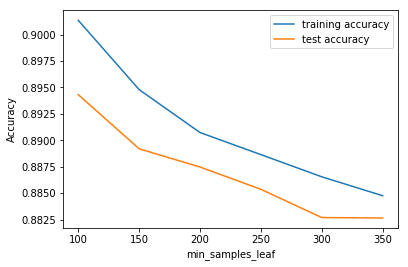

In [92]:
plot_accuracy("min_samples_leaf", scores)

In [93]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier( class_weight='balanced',
                                              criterion='gini', random_state = 100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,n_jobs = -1,verbose = 1,
                   scoring="accuracy")
rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
           

In [94]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.511503      0.054077         0.012649        0.000793   
1       1.429682      0.020876         0.013116        0.002048   
2       1.374243      0.016449         0.011932        0.000786   
3       1.340266      0.032587         0.011189        0.000384   
4       1.301513      0.028827         0.011567        0.001333   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.877582   
1                     250  {'min_samples_split': 250}           0.870482   
2                     300  {'min_samples_split': 300}           0.872418   
3                     350  {'min_samples_split': 350}           0.868115   
4                     400  {'min_samples_split': 400}           0.868330   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.916308           0.915017           0.917814           0.912651   
1           0.908133           0.913511           0.908133           0.910069   
2           0.907487           0.910714           0.911575           0.905981   
3           0.904475           0.901033           0.904260           0.903184   
4           0.905336           0.901248           0.906196           0.901248   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.907874        0.015241                1            0.930454   
1         0.902065        0.015913                2            0.921310   
2         0.901635        0.014751                3            0.919213   
3         0.896213        0.014102                5            0.916900   
4         0.896472        0.014218                4            0.914533   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.920450            0.920019            0.919858   
1            0.913780            0.913941            0.910445   
2            0.908617            0.908563            0.908724   
3            0.906358            0.902324            0.901517   
4            0.898720            0.900387            0.901786   

   split4_train_score  mean_train_score  std_train_score  
0            0.918191          0.921794         0.004397  
1            0.913780          0.914651         0.003579  
2            0.908993          0.910822         0.004198  
3            0.907272          0.906874         0.005484  
4            0.902861          0.903657         0.005612

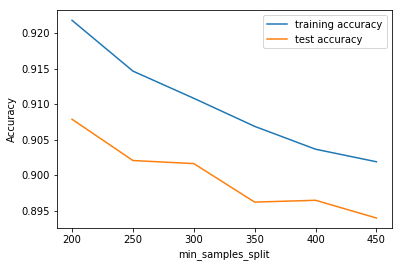

In [95]:
plot_accuracy("min_samples_split", scores)

In [96]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
param_grid = {
    'max_depth': range(6, 8, 1),
    'n_estimators': range(40,50,10),
    'max_features': range(7,20,3),
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(200, 250, 25)
}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight='balanced',
                                              criterion='gini', random_state = 100)


# fit tree on training data
rf = GridSearchCV(rf, param_grid = param_grid,
                    cv=n_folds, 
                    return_train_score=True,n_jobs = -1,verbose = 1,
                   scoring="recall")
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
           

In [97]:
# printing the optimal accuracy score and hyperparameters
display('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

'We can get accuracy of'

0.8992254733218589

'using'

{'max_depth': 7,
 'max_features': 19,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 40}

In [98]:
# model with the best hyperparameters
randomForestClassifier_model = RandomForestClassifier(bootstrap=True,
                             max_depth=rf.best_params_['max_depth'],
                             max_features=rf.best_params_['max_features'],
                             min_samples_leaf=rf.best_params_['min_samples_leaf'], 
                             min_samples_split=rf.best_params_['min_samples_split'],
                             n_estimators=rf.best_params_['n_estimators'])
randomForestClassifier_model.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=19, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# predict
predictions = randomForestClassifier_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.90      0.93      4921
           1       0.45      0.79      0.57       531

    accuracy                           0.89      5452
   macro avg       0.71      0.84      0.75      5452
weighted avg       0.92      0.89      0.90      5452

Accuracy of RandomForestClassifier Model on test set is  0.8204328686720469


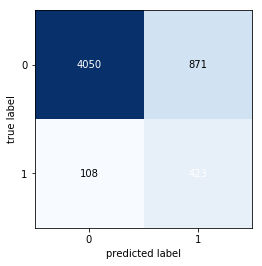

In [100]:
print(classification_report(y_test,predictions))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
print('Accuracy of RandomForestClassifier Model on test set is ',metrics.accuracy_score(y_test, y_pred))


With RandomforestClassifier accuracy is 82 same as with PCA and LR

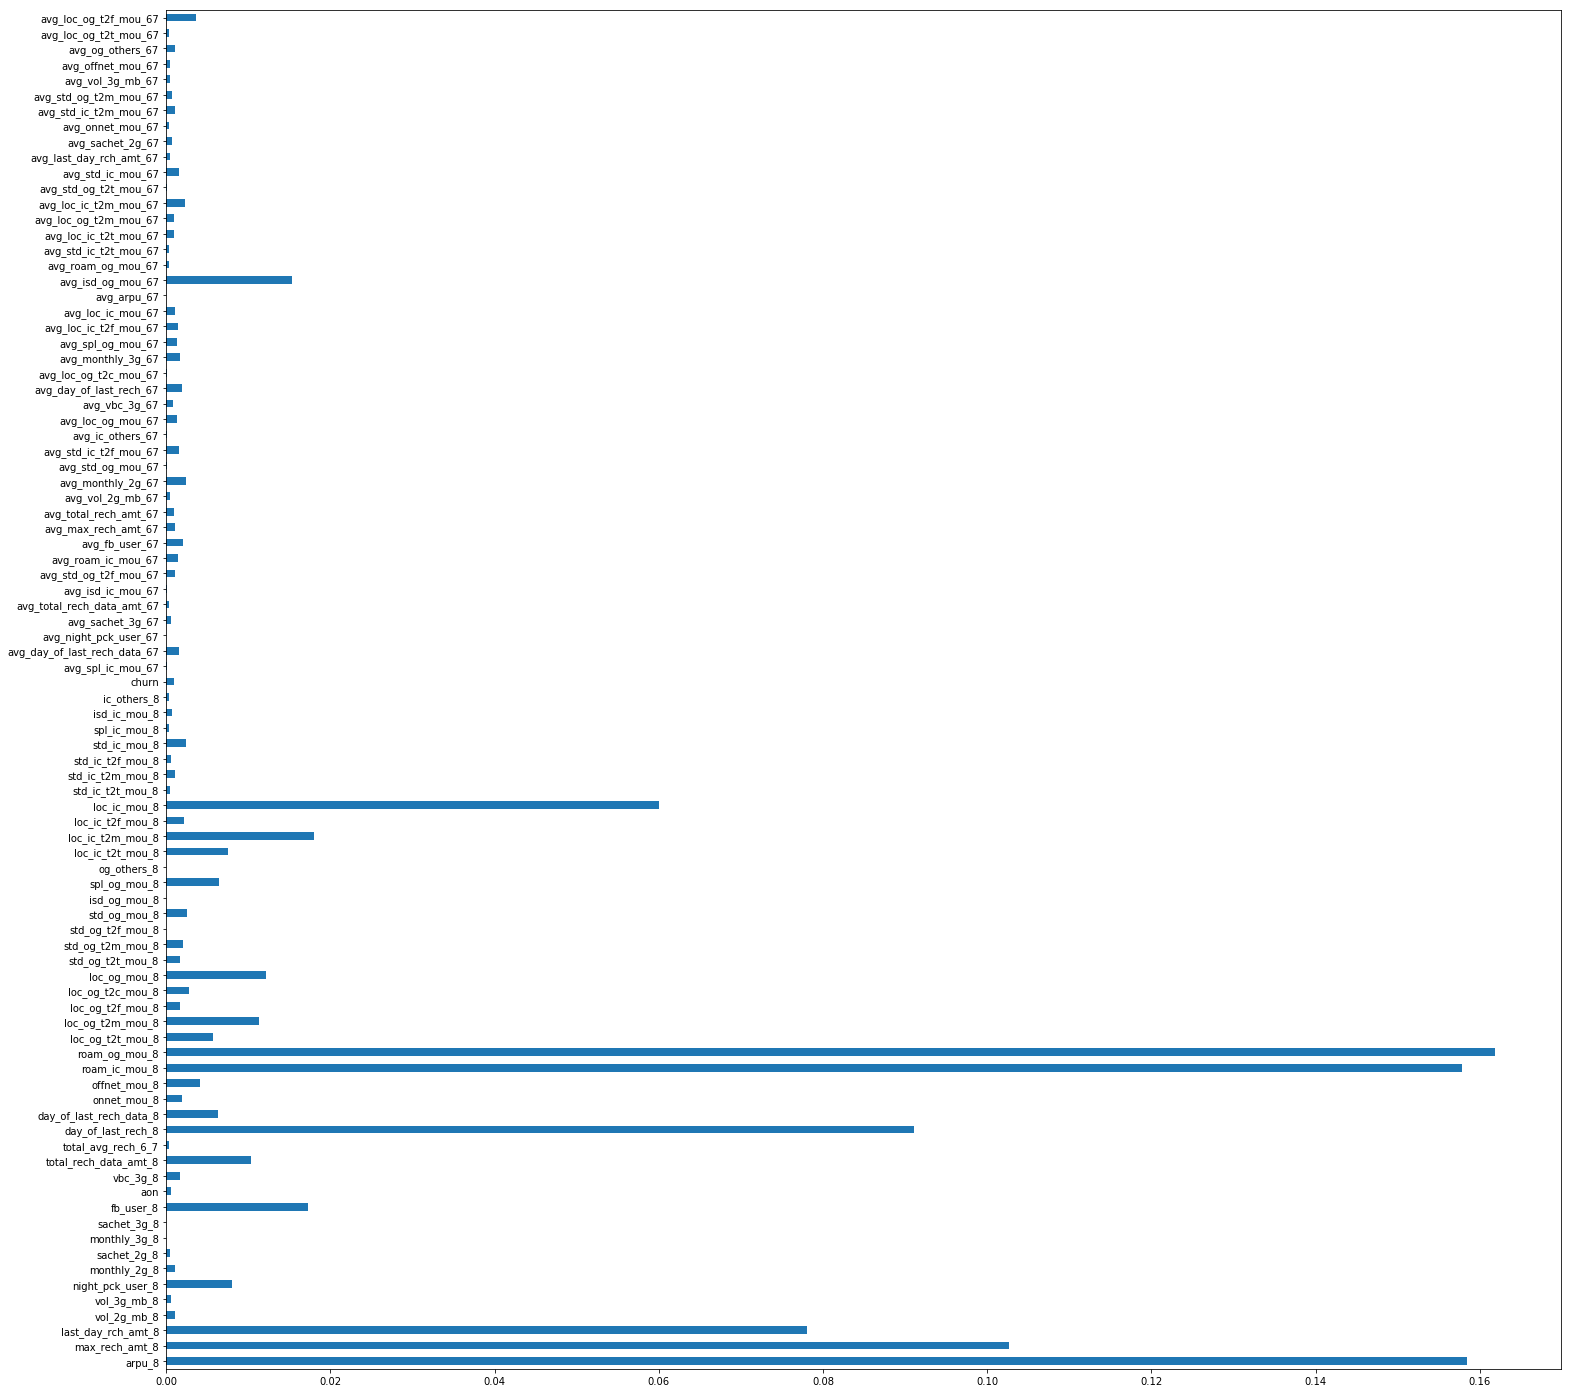

In [101]:
pd.Series( randomForestClassifier_model.feature_importances_, index=telecom_churn_data.columns.values[:-1]).plot(kind='barh',figsize=(25,25))

Telecom company can tink of creative ways to extend discounts based on usage (mins of use for in/out going mins) tears
to attract retention
and also tie it to aging on the network
